In [36]:
import argparse
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import os
import matplotlib.pyplot as plt
from numpy import array
import time
import math
import glob
import copy
import statistics
import ast
from toolkit import *

In [2]:
test_cases = glob.glob('../data/*')

In [3]:
test_cases

['../data\\K_10_C_50_S_3.txt',
 '../data\\K_3_C_33_S_5.txt',
 '../data\\K_3_C_60_S_20.txt',
 '../data\\K_4_C_50_S_10.txt',
 '../data\\K_6_C_50_S_7.txt']

In [4]:
index = 0

In [5]:
with open(test_cases[index]) as f:
    E = f.readline()
    P = f.readline()
    edges = f.readline()

In [6]:
E = ast.literal_eval(E.strip('\n'))
P = ast.literal_eval(P.strip('\n'))
edges = ast.literal_eval(edges.strip('\n'))

In [7]:
edges2 = edges

In [8]:
C = len(P) - 1

inserting into a list at an index is O(n), but the look up is O(1). This is better than what I previously attempted which is adding to a dict O(1), and look up possibly being O(n).

In [9]:
adj = [0 for x in range(0, C)]

In [10]:
# add all values to a list 
for i in range(0, C):
        adj[i] = Node(i, adj_start = P[i])   

In [11]:
degree_doubly = [DoublyLinkedList() for x in range(0, C-1) ]

In [12]:
max_degree = 0 
# calculate degree
for i in range(0, C):
    deg = P[i + 1] - P[i]
    adj[i].degree = deg
    adj[i].degree_start = deg
    degree_doubly[deg].insert_at_start(adj[i])
    if deg > max_degree:
        max_degree = deg

In [13]:
ordered = LinkedList()

In [14]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G,k=0.25,iterations=25)

In [15]:

def smallest_last_deletion(i=None, start=None, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, debug=True, pos = pos):
        n = degree_doubly[i].start_node
        next_check = copy.copy(start)
        left_over = False
        while n is not None:
    
            print('new i:', i)
            if adj[n.course].deleted is None and i > 0:
               
                if debug:
                    debugger(adj=adj, degree_doubly=degree_doubly, n=n, max_degree=max_degree, pos=pos, edges=edges)

                adj[n.course].degree_when_deleted =  adj[n.course].degree
                adj[n.course].deleted = -1
                degree_doubly[i].delete_element_by_value(n.course)
                n.nref_degree_list = None
                n.pref_degree_list = None
                ordered.insert_at_start(n)
                ordered.traverse_list()
                degree_doubly[0].insert_at_start(n)
                adjacents = n.degree_start
                n.degree = 0
                next_check = copy.copy(i)
                updated_start = copy.copy(i)
                print(n.__dict__)
                for j in range(n.adj_start, n.adj_start + adjacents):
                    if adj[E[j]].deleted is None:
                        degree = adj[E[j]].degree
                        
                        
                        if adj[E[j]].pref_degree_list is None and adj[E[j]].nref_degree_list is None:
                            degree_doubly[degree].start_node = None
                        elif adj[E[j]].pref_degree_list is not None and adj[E[j]].nref_degree_list is None:
                            adj[E[j]].pref_degree_list.nref_degree_list = None
                        elif  adj[E[j]].pref_degree_list is None and adj[E[j]].nref_degree_list is not None:
                            degree_doubly[degree].start_node = adj[E[j]].nref_degree_list
                            adj[E[j]].nref_degree_list.pref_degree_list = None
                        elif adj[E[j]].pref_degree_list is not None and adj[E[j]].nref_degree_list is not None:
                            adj[E[j]].nref_degree_list.pref_degree_list = adj[E[j]].pref_degree_list
                            adj[E[j]].pref_degree_list.nref_degree_list = adj[E[j]].nref_degree_list
                        
                        adj[E[j]].nref_degree_list = None
                        adj[E[j]].pref_degree_list = None
                        degree_doubly[degree-1].insert_at_start(adj[E[j]])
                        adj[E[j]].degree = adj[E[j]].degree - 1
                        print(adj[E[j]].__dict__)
                        if adj[E[j]].degree == 0:
                            ordered.insert_at_start(adj[E[j]])
                            ordered.traverse_list()
                            adj[E[j]].degree_when_deleted =  adj[E[j]].degree
                            adj[E[j]].deleted = -1
                            del pos[adj[E[j]].course]
                            print(adj[E[j]].__dict__)
                        print('start:', start)
                        if (adj[E[j]].degree < next_check or adj[E[j]].degree < start) and adj[E[j]].degree < updated_start:
                            next_check = adj[E[j]].degree
                            updated_start = adj[E[j]].degree
                        if (adj[E[j]].degree < next_check or adj[E[j]].degree < start) and adj[E[j]].degree > updated_start:
                            left_over = True
                            left_over_degree = adj[E[j]].degree
                        if adj[E[j]].degree == next_check:
                            i = i + 1
                        
                    
                del pos[n.course]
            
            if i > next_check:
                print('Case 1:', next_check)
                if next_check == 0:
                    next_check = start
                n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=next_check, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
            elif degree_doubly[i].start_node is not None:
                print('Case 2:')
                if next_check == 0:
                    next_check = start
                n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=next_check, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
            if left_over:
                if degree_doubly[left_over_degree].start_node is not None:
                    print('Case 3:')
#                     if next_check == 0:
#                         next_check = left_over_degree
                    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=left_over_degree, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                    if n == None:
                        break
                    else:
                        n = n.nref_degree_list
                elif degree_doubly[left_over_degree - 1].start_node is not None:
                    print('Case 4:')
#                     if next_check == 0:
#                         next_check = left_over_degree - 1
                    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=left_over_degree - 1, start=start, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos = pos)
                    if n == None:
                        break
                    else:
                        n = n.nref_degree_list
            else:
                i = start
                print('Continue...')
                n = degree_doubly[i].start_node
                if n == None:
                    break
                else:
                    n = n.nref_degree_list
                
            
            
        return n, adj, degree_doubly, ordered, pos

------------------ 1
------------------ 2
------------------ 3
------------------ 4
------------------ 5
------------------ 6
------------------ 7
------------------ 8
------------------ 9
new i: 9
course: 48
list:  0
[49, 44, 43, 39, 37, 36, 34, 33, 31, 29, 27, 26, 25, 22, 21, 19, 18, 17, 16, 15, 13, 10, 8, 5, 3, 1]
list:  1
List has no element
list:  2
List has no element
list:  3
List has no element
list:  4
List has no element
list:  5
List has no element
list:  6
List has no element
list:  7
List has no element
list:  8
List has no element
list:  9
[48, 47, 42, 41, 40, 38, 35, 32, 30, 28, 24, 23, 20, 14, 11, 9, 4, 2, 0]
list:  10
List has no element
list:  11
List has no element
list:  12
List has no element
list:  13
List has no element
list:  14
List has no element
list:  15
[45, 12, 6]
list:  16
List has no element
list:  17
[46]
list:  18
List has no element
list:  19
List has no element
list:  20
List has no element
list:  21
List has no element
list:  22
List has no element


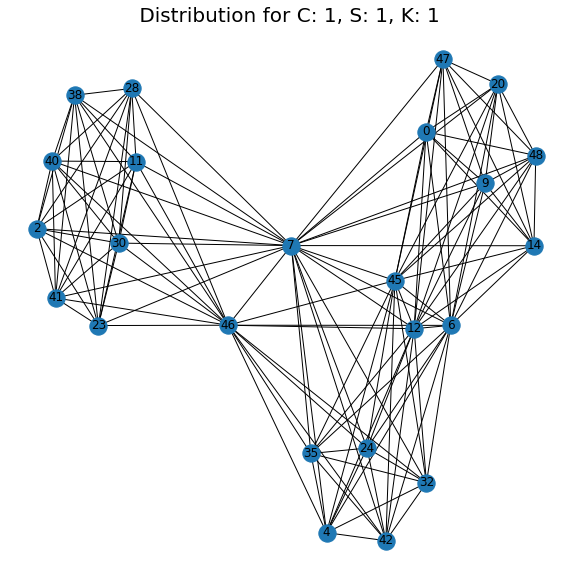

[48]
{'course': 48, 'adj_start': 247, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x00000162048605C0>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 9, 'ref': None}
{'course': 0, 'adj_start': 0, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 14, 'degree_start': 15, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 22, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 9, 'adj_start': 65, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862898>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 

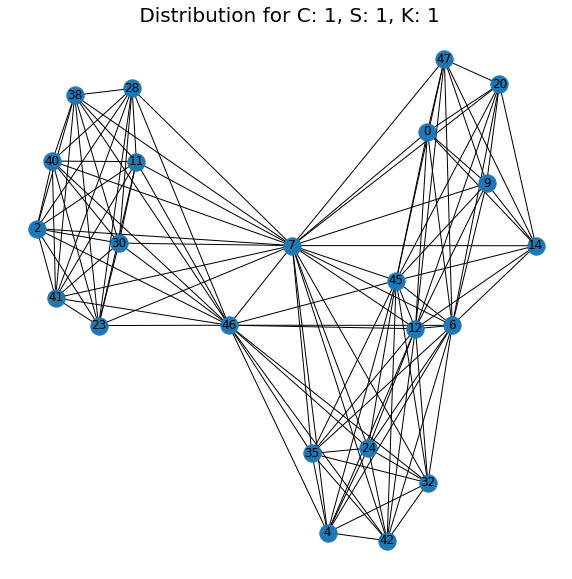

[47, 48]
{'course': 47, 'adj_start': 238, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860518>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 8, 'ref': <toolkit.Node object at 0x0000016204860518>}
{'course': 0, 'adj_start': 0, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 13, 'degree_start': 15, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 21, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 9, 'adj_start': 65, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862898>, 'pref_degree_list': None, 'color

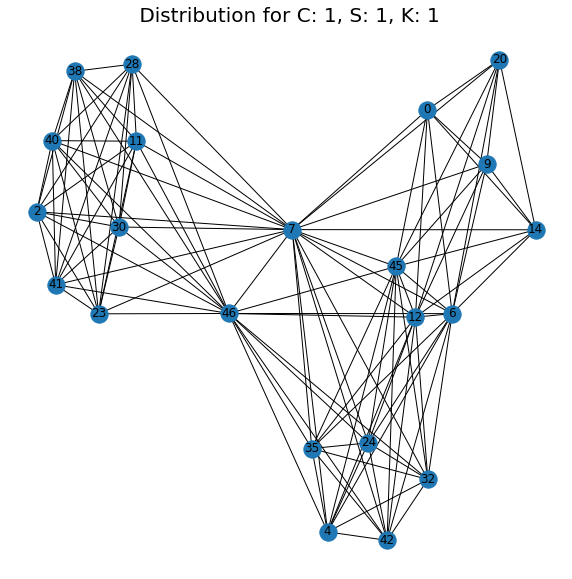

[20, 47, 48]
{'course': 20, 'adj_start': 107, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860470>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 7, 'ref': <toolkit.Node object at 0x0000016204860470>}
{'course': 0, 'adj_start': 0, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 12, 'degree_start': 15, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 20, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 9, 'adj_start': 65, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862898>, 'pref_degree_list': None, 'c

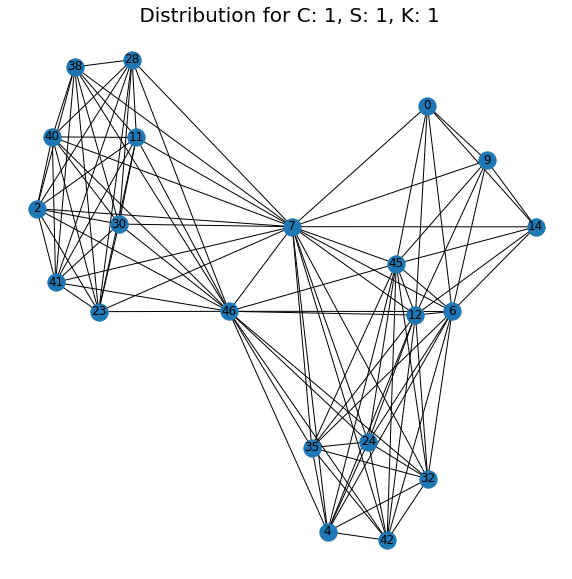

[14, 20, 47, 48]
{'course': 14, 'adj_start': 98, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862CF8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 6, 'ref': <toolkit.Node object at 0x0000016204862CF8>}
{'course': 0, 'adj_start': 0, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 11, 'degree_start': 15, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 19, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 9, 'adj_start': 65, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862898>, 'pref_degree_list': None,

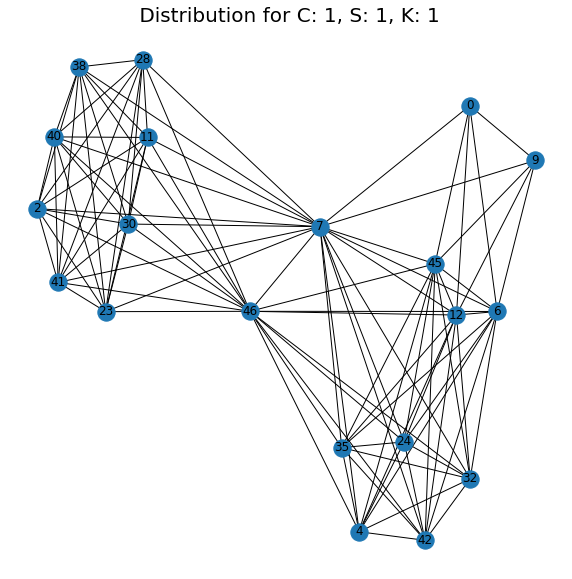

[9, 14, 20, 47, 48]
{'course': 9, 'adj_start': 65, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862BA8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 5, 'ref': <toolkit.Node object at 0x0000016204862BA8>}
{'course': 0, 'adj_start': 0, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 10, 'degree_start': 15, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 18, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 12, 'adj_start': 83, 'degree': 10, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x00000162048629E8>, 'pref_degree_list': 

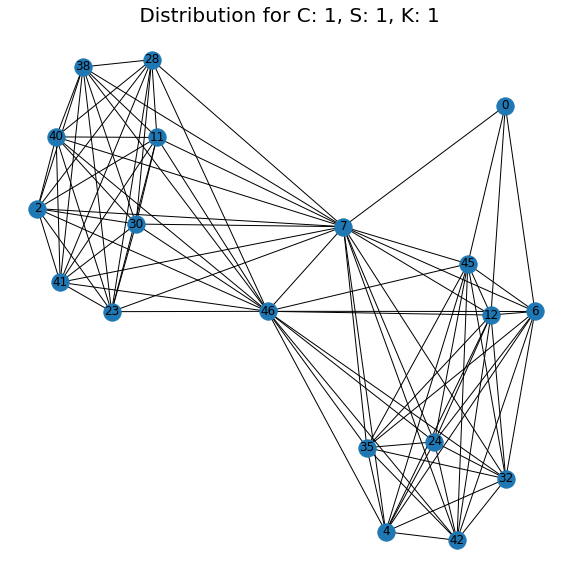

[0, 9, 14, 20, 47, 48]
{'course': 0, 'adj_start': 0, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862A90>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 4, 'ref': <toolkit.Node object at 0x0000016204862A90>}
{'course': 6, 'adj_start': 27, 'degree': 9, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204860390>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 17, 'degree_start': 23, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204860400>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 12, 'adj_start': 83, 'degree': 9, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x00000162048629E8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 45, 'adj_start': 206, 'degree': 9, '

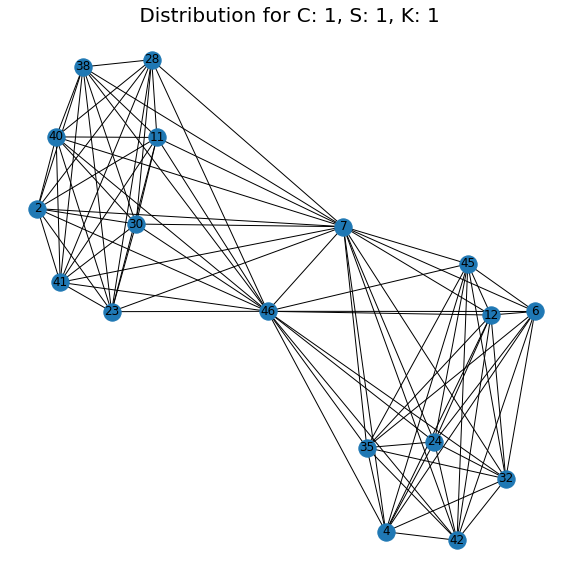

[12, 0, 9, 14, 20, 47, 48]
{'course': 12, 'adj_start': 83, 'degree': 0, 'degree_start': 15, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862898>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 9, 'ref': <toolkit.Node object at 0x0000016204862898>}
{'course': 4, 'adj_start': 18, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 8, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 16, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 24, 'adj_start': 125, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node obje

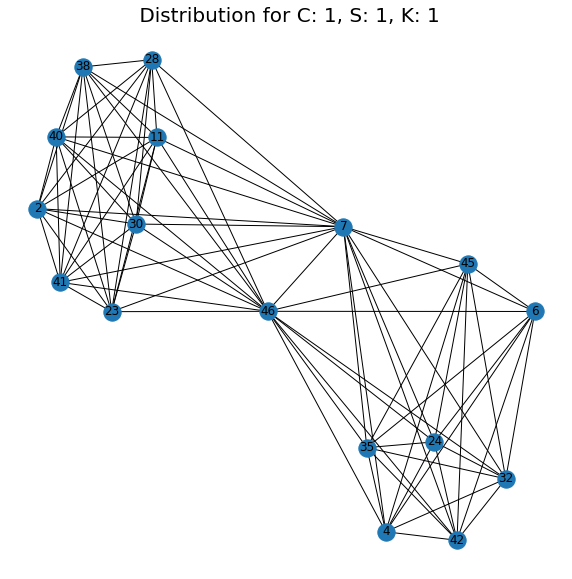

[45, 12, 0, 9, 14, 20, 47, 48]
{'course': 45, 'adj_start': 206, 'degree': 0, 'degree_start': 15, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B38>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 8, 'ref': <toolkit.Node object at 0x0000016204862B38>}
{'course': 4, 'adj_start': 18, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 7, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 15, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 24, 'adj_start': 125, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node

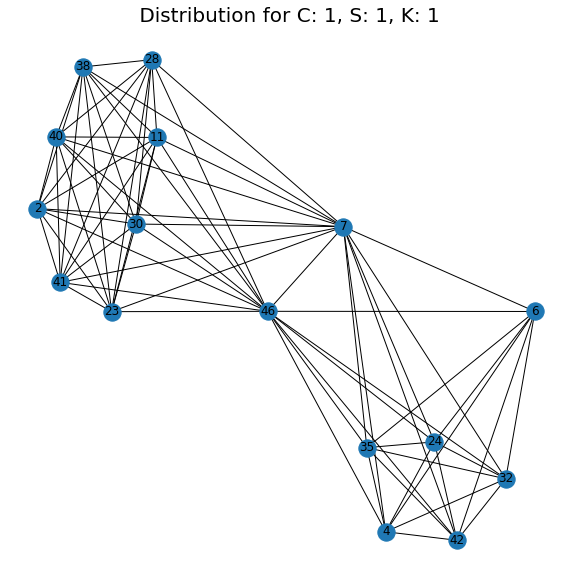

[42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 42, 'adj_start': 197, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860080>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 7, 'ref': <toolkit.Node object at 0x0000016204860080>}
{'course': 4, 'adj_start': 18, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 6, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 14, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 24, 'adj_start': 125, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.N

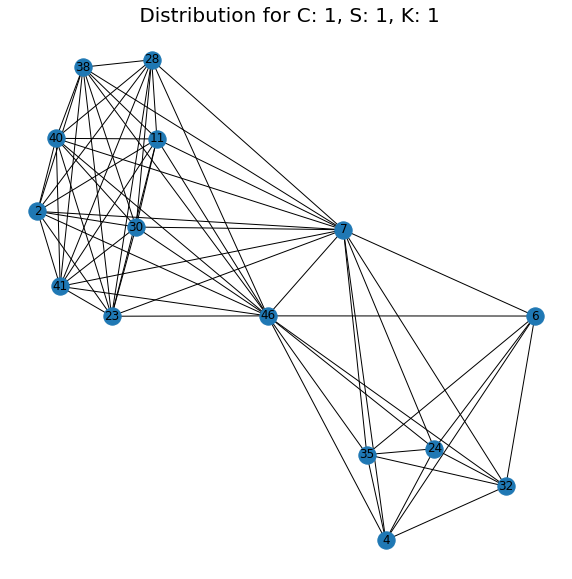

[35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 35, 'adj_start': 161, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860390>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 6, 'ref': <toolkit.Node object at 0x0000016204860390>}
{'course': 4, 'adj_start': 18, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 5, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 13, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 24, 'adj_start': 125, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolk

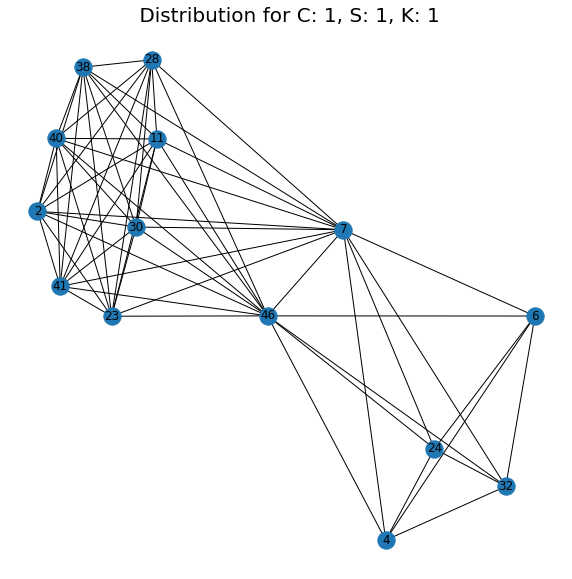

[32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 32, 'adj_start': 152, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860048>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 5, 'ref': <toolkit.Node object at 0x0000016204860048>}
{'course': 4, 'adj_start': 18, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 4, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 12, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 24, 'adj_start': 125, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <t

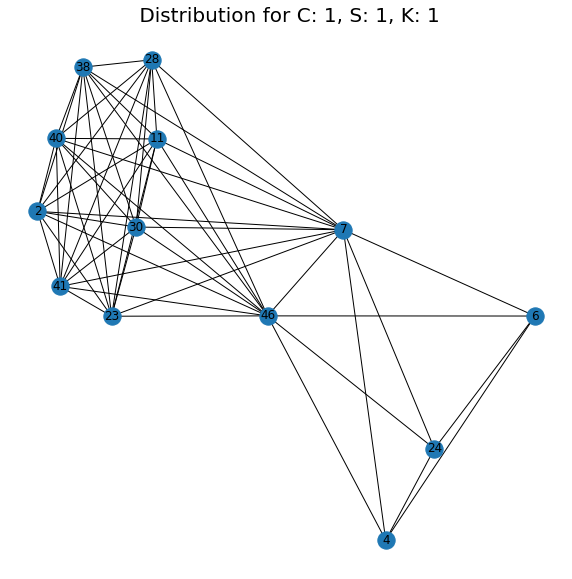

[24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 24, 'adj_start': 125, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862F98>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 4, 'ref': <toolkit.Node object at 0x0000016204862F98>}
{'course': 4, 'adj_start': 18, 'degree': 3, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 6, 'adj_start': 27, 'degree': 3, 'degree_start': 15, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 11, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 46, 'adj_start': 221, 'degree': 11, 'degree_start': 17, 'deleted': None, 'nref_degree_lis

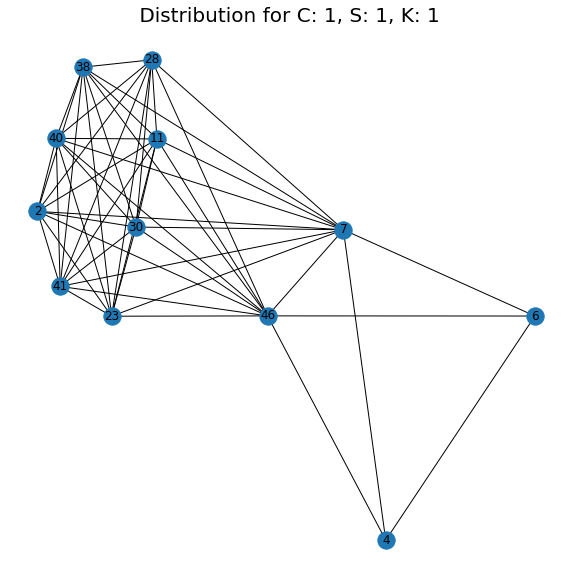

[6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 6, 'adj_start': 27, 'degree': 0, 'degree_start': 15, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862DD8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 3, 'ref': <toolkit.Node object at 0x0000016204862DD8>}
{'course': 4, 'adj_start': 18, 'degree': 2, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 7, 'adj_start': 42, 'degree': 10, 'degree_start': 23, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 46, 'adj_start': 221, 'degree': 10, 'degree_start': 17, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862A20>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
Case 1: 2
new i: 2
course: 4
list:  0
[6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48, 49, 44,

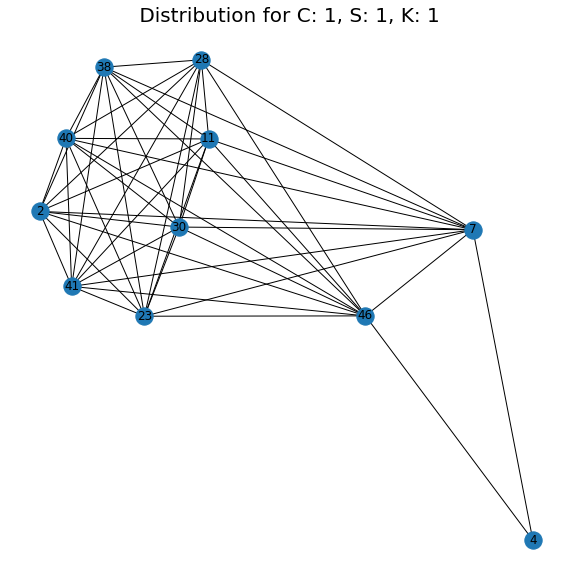

[4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 4, 'adj_start': 18, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x00000162048629E8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 2, 'ref': <toolkit.Node object at 0x00000162048629E8>}
{'course': 7, 'adj_start': 42, 'degree': 9, 'degree_start': 23, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204860358>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 46, 'adj_start': 221, 'degree': 9, 'degree_start': 17, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862A20>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
Continue...
new i: 9
course: 7
list:  0
[4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48, 49, 44, 43, 39, 37, 36, 34, 33, 31, 29, 27, 26, 25, 22, 21, 19, 18, 17, 16, 15, 13, 10, 8, 5, 3, 1]
list:  1
List has no element
list:  2
List has

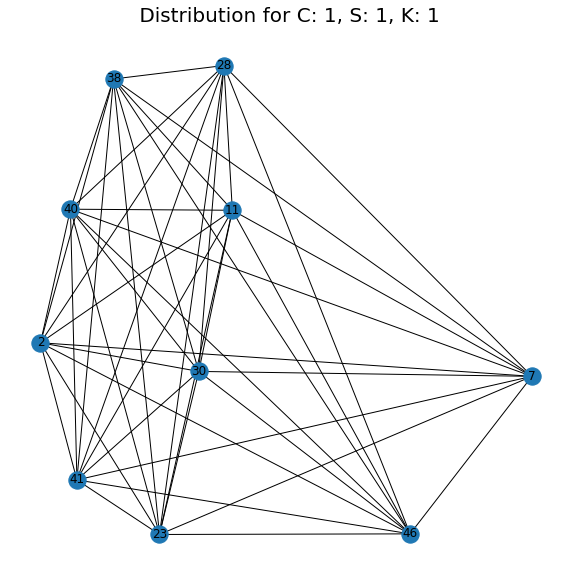

[7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 7, 'adj_start': 42, 'degree': 0, 'degree_start': 23, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862978>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 9, 'ref': <toolkit.Node object at 0x0000016204862978>}
{'course': 2, 'adj_start': 9, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 8, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 'degree': 8, 'degree_

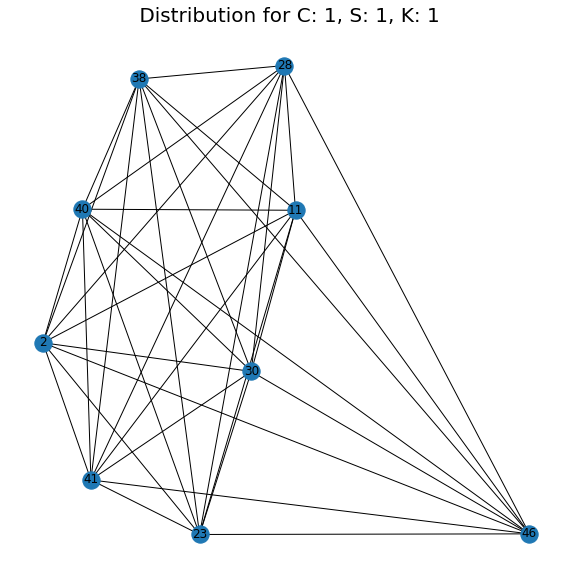

[46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 46, 'adj_start': 221, 'degree': 0, 'degree_start': 17, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862A20>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 8, 'ref': <toolkit.Node object at 0x0000016204862A20>}
{'course': 2, 'adj_start': 9, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 7, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 'degree': 7, 'd

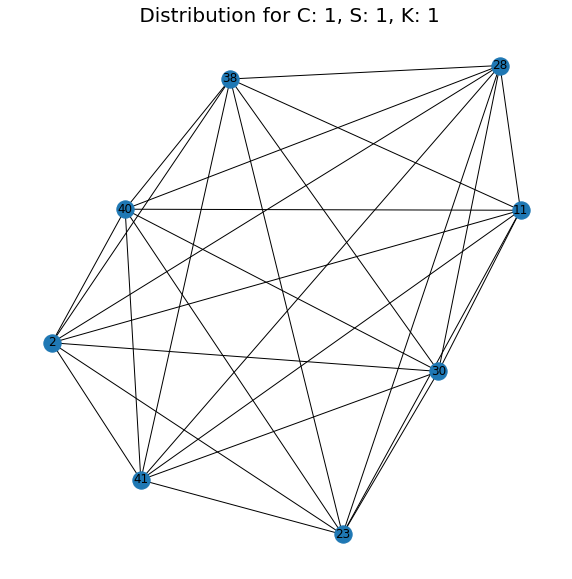

[41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 41, 'adj_start': 188, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860400>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 7, 'ref': <toolkit.Node object at 0x0000016204860400>}
{'course': 2, 'adj_start': 9, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 6, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 'degree': 6,

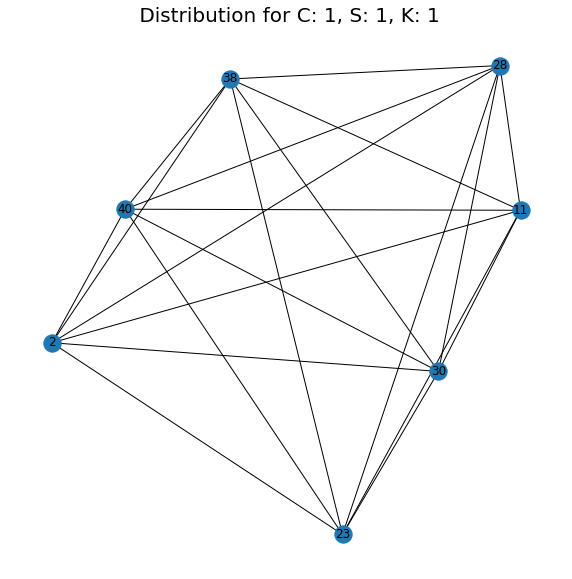

[40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 40, 'adj_start': 179, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860358>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 6, 'ref': <toolkit.Node object at 0x0000016204860358>}
{'course': 2, 'adj_start': 9, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 5, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 'degree'

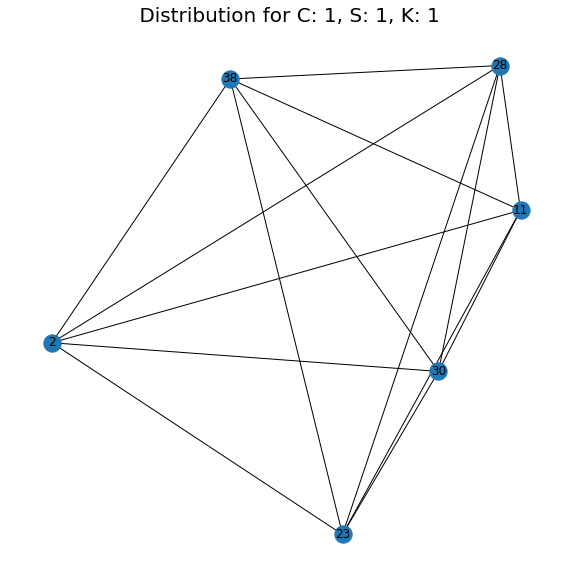

[38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 38, 'adj_start': 170, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x00000162048603C8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 5, 'ref': <toolkit.Node object at 0x00000162048603C8>}
{'course': 2, 'adj_start': 9, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 4, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 'deg

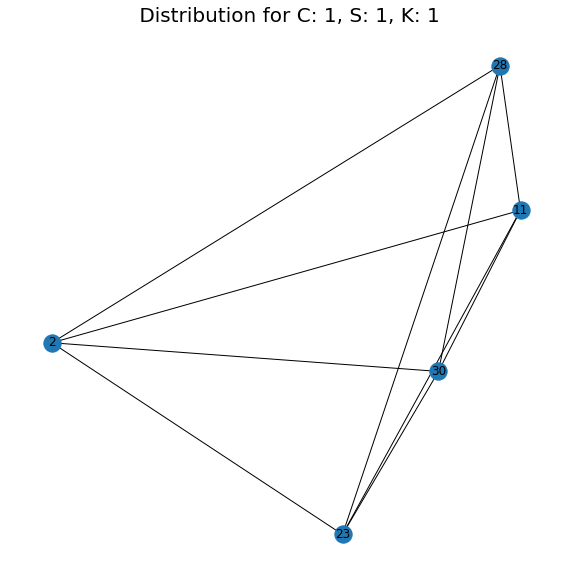

[30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 30, 'adj_start': 143, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204860198>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 4, 'ref': <toolkit.Node object at 0x0000016204860198>}
{'course': 2, 'adj_start': 9, 'degree': 3, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 3, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 3, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 28, 'adj_start': 134, 

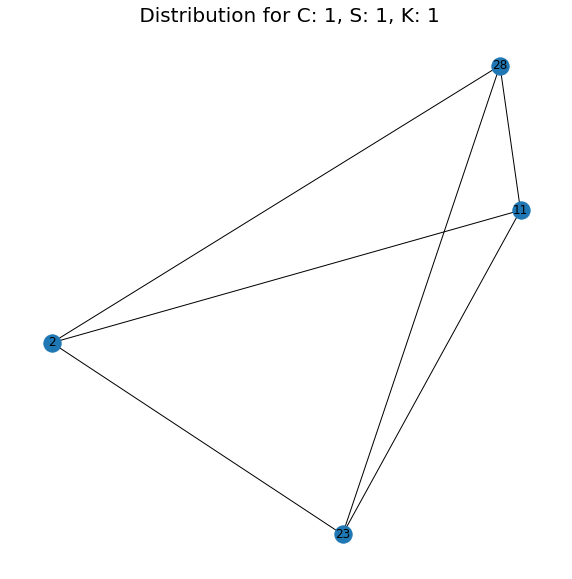

[28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 28, 'adj_start': 134, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862F28>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 3, 'ref': <toolkit.Node object at 0x0000016204862F28>}
{'course': 2, 'adj_start': 9, 'degree': 2, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 2, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 23, 'adj_start': 116, 'degree': 2, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
Case 1: 2
new i: 2
course: 23

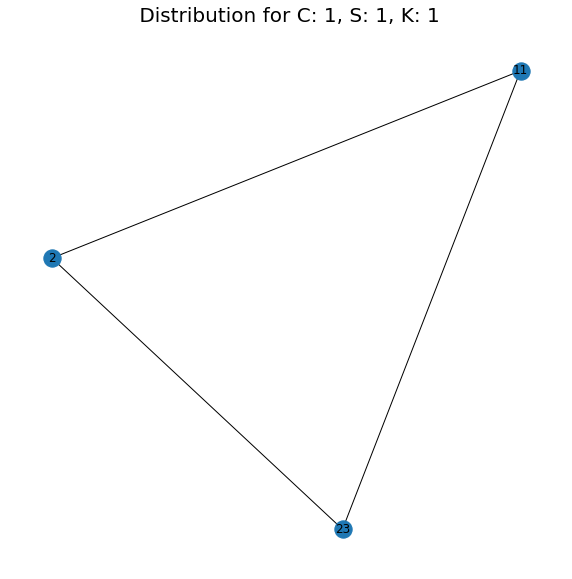

[23, 28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 23, 'adj_start': 116, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862EB8>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 2, 'ref': <toolkit.Node object at 0x0000016204862EB8>}
{'course': 2, 'adj_start': 9, 'degree': 1, 'degree_start': 9, 'deleted': None, 'nref_degree_list': None, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
{'course': 11, 'adj_start': 74, 'degree': 1, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862908>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
start: 9
Case 1: 1
new i: 1
course: 11
list:  0
[23, 28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48, 49, 44, 43, 39, 37, 36, 34, 33, 31, 29, 27, 26, 25, 22, 21, 19, 18, 17, 16, 15, 13, 10, 8, 5, 3, 1]
list:  1
[11, 2]
list:  2


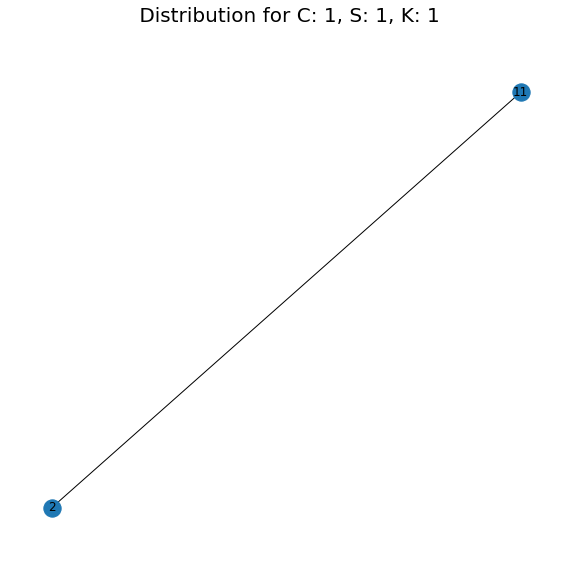

[11, 23, 28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 11, 'adj_start': 74, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862DA0>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 1, 'ref': <toolkit.Node object at 0x0000016204862DA0>}
{'course': 2, 'adj_start': 9, 'degree': 0, 'degree_start': 9, 'deleted': None, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': None}
[2, 11, 23, 28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]
{'course': 2, 'adj_start': 9, 'degree': 0, 'degree_start': 9, 'deleted': -1, 'nref_degree_list': <toolkit.Node object at 0x0000016204862B00>, 'pref_degree_list': None, 'color': -1, 'degree_when_deleted': 0, 'ref': <toolkit.Node object at 0x0000016204862B00>}
start: 9
Case 1: 0
------------------ 10
------------------ 11
------------------ 12
----

In [16]:
for i in range(1, max_degree):
    print('------------------', i)
    n, adj, degree_doubly, ordered, pos = smallest_last_deletion(i=i, start=i, max_degree=max_degree, degree_doubly=degree_doubly, adj=adj, ordered=ordered, pos=pos)

In [17]:
coloring_order = ordered.traverse_list()

[2, 11, 23, 28, 30, 38, 40, 41, 46, 7, 4, 6, 24, 32, 35, 42, 45, 12, 0, 9, 14, 20, 47, 48]


In [18]:
for x in adj:
    x.color = -1

In [19]:
def crayon(coloring_order=coloring_order, adj=adj, max_degree=max_degree):
    
    for course in coloring_order:
        print('course:', course)
        if adj[course].degree_start > 0:
            taken = []
            options = [-1] * max_degree
            for j in range(adj[course].adj_start, adj[course].adj_start + adj[course].degree_start):
                if adj[E[j]].color >= 0:
                    taken.append(adj[E[j]].color)
            if len(taken) == 0:
                adj[course].color = 0
            elif len(taken) > 0:
                for i in taken:
                    options[i] = 1
                
            print(taken)
            for k in range(0,len(options)):
                if options[k] == -1:
                    print('c:', k)
                    adj[course].color = k
                    break
    
    return adj
                    

In [20]:
adj = crayon(coloring_order, adj)

course: 2
[]
c: 0
course: 11
[0]
c: 1
course: 23
[0, 1]
c: 2
course: 28
[0, 1, 2]
c: 3
course: 30
[0, 1, 2, 3]
c: 4
course: 38
[0, 1, 2, 3, 4]
c: 5
course: 40
[0, 1, 2, 3, 4, 5]
c: 6
course: 41
[0, 1, 2, 3, 4, 5, 6]
c: 7
course: 46
[0, 1, 2, 3, 4, 5, 6, 7]
c: 8
course: 7
[0, 1, 2, 3, 4, 5, 6, 7, 8]
c: 9
course: 4
[9, 8]
c: 0
course: 6
[0, 9, 8]
c: 1
course: 24
[0, 1, 9, 8]
c: 2
course: 32
[0, 1, 9, 2, 8]
c: 3
course: 35
[0, 1, 9, 2, 3, 8]
c: 4
course: 42
[0, 1, 9, 2, 3, 4, 8]
c: 5
course: 45
[0, 1, 9, 2, 3, 4, 5, 8]
c: 6
course: 12
[0, 1, 9, 2, 3, 4, 5, 6, 8]
c: 7
course: 0
[1, 9, 7, 6]
c: 0
course: 9
[0, 1, 9, 7, 6]
c: 2
course: 14
[0, 1, 9, 2, 7, 6]
c: 3
course: 20
[0, 1, 9, 2, 7, 3, 6]
c: 4
course: 47
[0, 1, 9, 2, 7, 3, 4, 6]
c: 5
course: 48
[0, 1, 9, 2, 7, 3, 4, 6, 5]
c: 8


In [21]:
colors = []
for n in coloring_order:
    if adj[n].degree_start >= 1:
        colors.append(adj[n].color)

In [22]:
colors_dict = dict( (l, colors.count(l) ) for l in set(colors))

In [23]:
print('Number of colors:', len(colors_dict.keys()))

Number of colors: 10


In [24]:
color_map = {0: 'blue', 1: 'green', 2:'black', 3: 'red', 4: 'orange', 5:'purple', 6:'violet', 7:'hotpink', 8:'chocolate', 9:'palegreen', 10:'thistle' }

In [25]:
color_graph= [color_map[k] for k in colors]

In [26]:
G = nx.Graph()
G.add_edges_from(edges2)
pos = nx.spring_layout(G,k=0.25,iterations=25)

In [27]:
courses_per = int(test_cases[index].split('_')[1])
students = int(test_cases[index].split('_')[5].strip('.txt'))

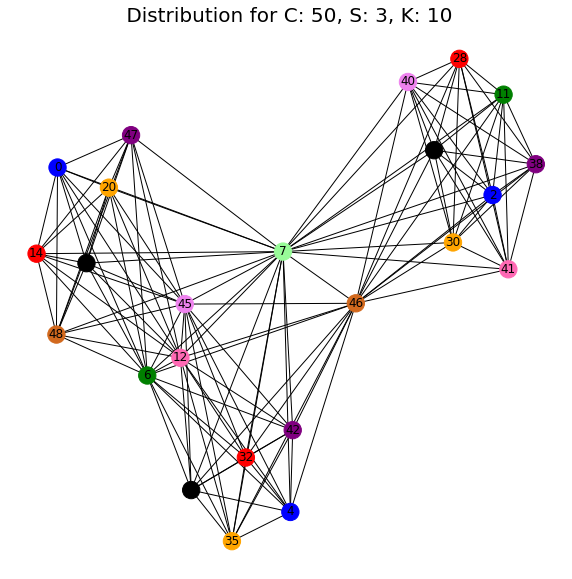

In [28]:
network_vis2(Edges=edges2, pos=pos, courses_per=courses_per, students=students, classes=C, nodes=coloring_order, colors=color_graph)

In [34]:
when_deleted_plot = []
original_degree = []
for x in coloring_order:
    when_deleted_plot.insert(0, adj[x].degree_when_deleted)
    original_degree.insert(0, adj[x].degree_start)    

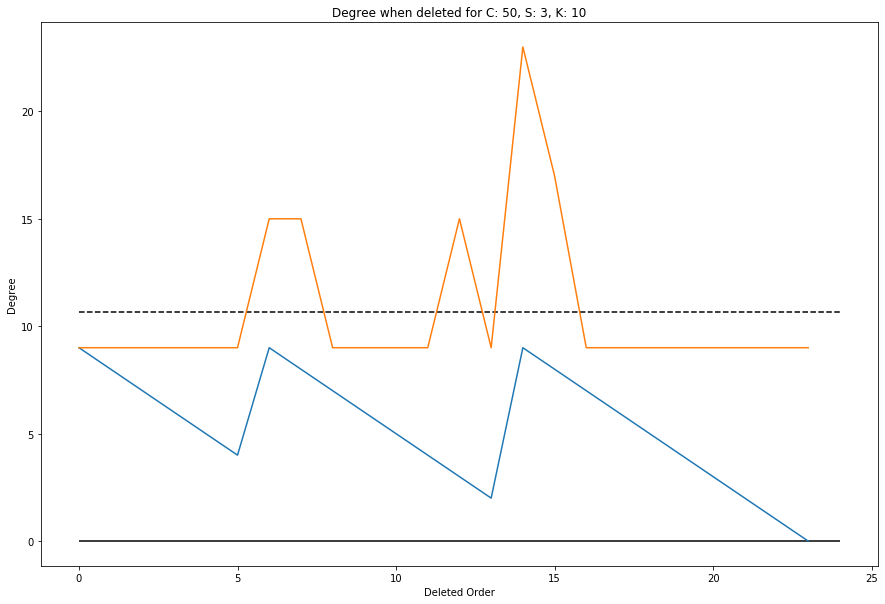

In [45]:
# for plotting
fig, ax = plt.subplots(1, figsize=(15,10))
# the histogram of the data
ax.plot(when_deleted_plot)
ax.plot(original_degree)
ax.hlines(statistics.mean(original_degree), linestyle='--', xmin=0, xmax=len(colors))
ax.hlines(len(colors_dict.keys()), linestyle='-', xmin=0, xmax=len(colors))
ax.set_xlabel('Deleted Order')
#ax.set_yticks([1,2,3])
ax.set_ylabel('Degree')
ax.set_title('Degree when deleted for C: %d, S: %d, K: %d' % (C, students, courses_per) )
plt.show()